In [1]:
%matplotlib widget

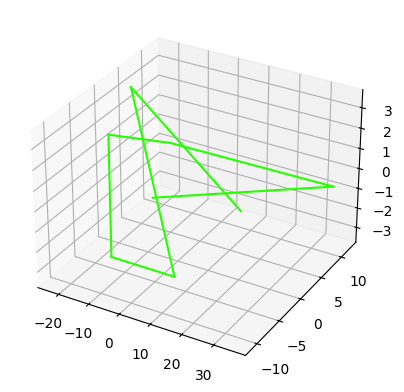

In [1]:
import time
import h5py
import matplotlib.pyplot as plt
import numpy as np
from population_analysis.util import filter_by_unitlabel
from population_analysis.trajectory.plots import rate_correlogram, traj_changemaps, traj_3d_parametric    
from population_analysis.trajectory.plots import show_spline, traj_animated_shaped_path, pop_vec_traj
from population_analysis.trajectory.plots import traj_shaped_path, pop_vec_traj_clusters

data = h5py.File("../testdata/data1.hdf")
# dd = dictify_hd5(data)

# dg is drifing grating
all_units = data["rProbe"]["dg"]["left"]
all_unit_labels = data["unitLabel"]
# for p in plots:
#     p(arr["left"][0], arr["left"][1])

units = np.array(data["unitNumber"]).flatten()
session_unit_counts = []
session_idxs = []
previous = 0
for idx, u in enumerate(units):
    if u > previous:
        previous = u
    else:
        session_unit_counts.append(units[idx-1])
        session_idxs.append(max(idx-1, 0))
        previous = 0

session_num = 1
label_num = 1.0  # Number of the label from clustering

session_units = all_units[session_idxs[session_num-1]: session_idxs[session_num]]
session_units_cluster_labels = all_unit_labels[session_idxs[session_num-1]: session_idxs[session_num]]

_unique_label_vals = np.unique(session_units_cluster_labels[:, 0])
session_cluster_labels = _unique_label_vals[np.logical_not(np.isnan(_unique_label_vals))]
clustered_units = []
for label in session_cluster_labels:
    clustered_units.append(
        filter_by_unitlabel(session_units, session_units_cluster_labels, label)
    )

pop_vec_traj_clusters(clustered_units)

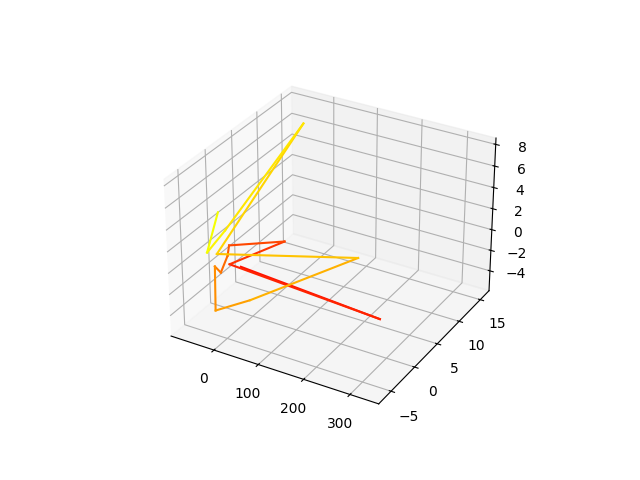

In [9]:
session_cluster_units = filter_by_unitlabel(session_units, session_units_cluster_labels, session_cluster_labels[2])
pop_vec_traj(session_cluster_units)